In [58]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
cleandating_df = pd.read_csv('../data/Clean Data/Mason_Clean_Teen_Dating.csv')

In [60]:
cleandating_df

,CaseID,hear_frequency,hear_from_you_frequency,sm_feel_connected,sm_feel_closer,sm_feel_jealous,sm_show_care,sm_different,sm_authentic,sm_escape,...,blocked_ex_text,sig_other_checked_internet,sig_other_read_texts,sig_other_remove_ex,sig_other_put_down,sig_other_demand_pw,sig_other_harass_internet,sig_other_internet_sexually,sig_other_rumors_internet,sig_other_threaten_internet
0,5,4,2,2,3,3,3,2,3,2,...,2,3,2,3,3,3,3,3,3,3
1,9,,,,,,,,,,...,,,,,,,,,,
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pinterest,1,3,5,1,59,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,2165,,,,,,,,,,...,,,,,,,,,,
1638,2167,,,,,,,,,,...,,,,,,,,,,
1639,2168,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,3,3,3
1640,2170,,,,,,,,,,...,,,,,,,,,,


# Questions

There are three primary questions that I intend to answer by analyzing my subset of data. They are as follows:

1. Does social media make people in relationships feel closer or more connected given that it allows for more frequent, easier forms of communication?
2. Do people interpret social media as a legitimate representation of a partner's or ex-partner's lifestyle, and how does this interpretation impact those involved?
3. Are people in relationships able to have meaningful interactions through texting/social media?

# Q1 Steps

1. Create visuals (bar graphs) that compare how often people communicate via social media when they are in relationships, how often they expect to be communicating with their partner, and how much closer/connected the stakeholders feel as a result
2. Analyze said visuals to determine whether or not there is a legitimate and beneficial correlation
3. Draw conclusions

# Q1 Code

In [61]:
mappingpknowledge_freq = {'1':'hourly', '2':'few_hours', '3':'daily', '4': 'few_times_week', '5': 'weekly', '6': 'less_often', '0':None, 'NaN': None, '':None, '-1':None}
cleandating_df['hear_frequency'] = cleandating_df['hear_frequency'].map(mappingpknowledge_freq)

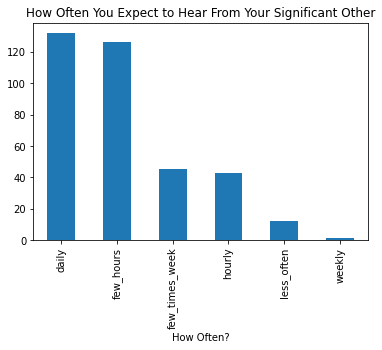

In [62]:
cleandating_df['hear_frequency'].replace(' ', np.nan, inplace=True)
frequency_rf = cleandating_df['hear_frequency'].isna()
cleandating_df[-frequency_rf]['hear_frequency'].value_counts().plot(kind='bar')
plt.title('How Often You Expect to Hear From Your Significant Other')
plt.xlabel('How Often?');

In [63]:
cleandating_df['hear_from_you_frequency'] = cleandating_df['hear_from_you_frequency'].map(mappingpknowledge_freq)

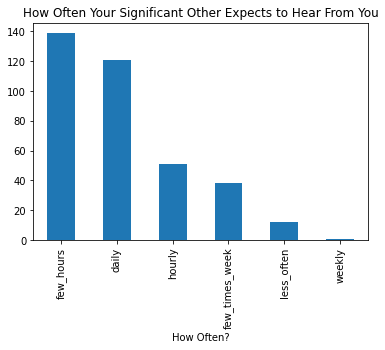

In [64]:
cleandating_df['hear_from_you_frequency'].replace(' ', np.nan, inplace=True)
frequency_rf = cleandating_df['hear_from_you_frequency'].isna()
cleandating_df[-frequency_rf]['hear_from_you_frequency'].value_counts().plot(kind='bar')
plt.title('How Often Your Significant Other Expects to Hear From You')
plt.xlabel('How Often?');

In [65]:
mappingpknowledge_cnct = {'1':'a lot', '2':'a little', '3':'no', '4': 'DNA', '5': 'refused', '0':None, 'NaN': None, '':None, '-1':None}
cleandating_df['sm_feel_connected'] = cleandating_df['sm_feel_connected'].map(mappingpknowledge_cnct)

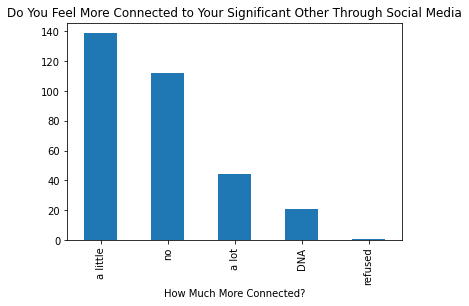

In [66]:
cleandating_df['sm_feel_connected'].replace(' ', np.nan, inplace=True)
connected_rf = cleandating_df['sm_feel_connected'].isna()
cleandating_df[-connected_rf]['sm_feel_connected'].value_counts().plot(kind='bar')
plt.title('Do You Feel More Connected to Your Significant Other Through Social Media')
plt.xlabel('How Much More Connected?');

In [67]:
cleandating_df['sm_feel_closer'] = cleandating_df['sm_feel_closer'].map(mappingpknowledge_cnct)

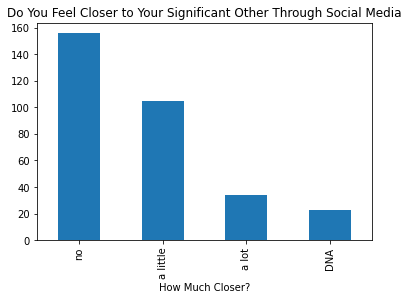

In [68]:
cleandating_df['sm_feel_closer'].replace(' ', np.nan, inplace=True)
closer_rf = cleandating_df['sm_feel_closer'].isna()
cleandating_df[-closer_rf]['sm_feel_closer'].value_counts().plot(kind='bar')
plt.title('Do You Feel Closer to Your Significant Other Through Social Media')
plt.xlabel('How Much Closer?');

# Q1 Answer

People clearly expect to hear from their significant other more frequently than they believe their significant other expects to hear from them, with the two most common answers being "daily" or "every few hours." That being said, respondents indicated that, for the most part, they either feel only marginally closer and more connected to their significant other as a result of social media, or not closer/more connected whatsoever.

# Q1 Interpretation/Observations

Given the dichotomy between how often people to expect to hear from their partners and how often they believe their partners expect to hear from them, one follow-up question would be why this dissonance exists, and whether or not it is consistent across other questions asked in the survey. Furthermore, if people, for the most part, do not feel much closer or closer at all to their partners because of social media, is this result (or lack thereof) consistent with more negative questions associated with social media and relationships, as well? The latter question will likely be answered through analysis of Questions 2 and 3 of this notebook.

# Q2 Steps

1) Identify questions/columns that deal with interpretation of social media
2) Create visuals for said questions
3) Draw conclusions

# Q2 Code

In [69]:
cols_to_use = [
    'sm_different',
    'sm_authentic',
    'sm_escape',
    'sm_too_many',
    'sm_support_rel_end',
    'sm_post_support',
    'sm_post_affection',
]
q2_df = cleandating_df[cols_to_use]

In [70]:
q2_df

,sm_different,sm_authentic,sm_escape,sm_too_many,sm_support_rel_end,sm_post_support,sm_post_affection
0,2,3,2,2,1,1,2
1,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,5,1,NaN,NaN
4,,,,,,,
...,...,...,...,...,...,...,...
1637,,,,,,,
1638,,,,,,,
1639,3,3,3,3,3,1,2
1640,,,,,,,


In [71]:
mappingpknowledge_side = {'1':'strongly agree', '2':'agree', '3':'disagree', '4': 'strongly disagree', '59': 'refused', '0':None, 'NaN': None, '71':None, '22':None}
q2_df['sm_different'] = q2_df['sm_different'].map(mappingpknowledge_side)

/tmp/ipykernel_767355/790895982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_different'] = q2_df['sm_different'].map(mappingpknowledge_side)


/usr/local/anaconda3/share/jupyter/venv/py3_comm318/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


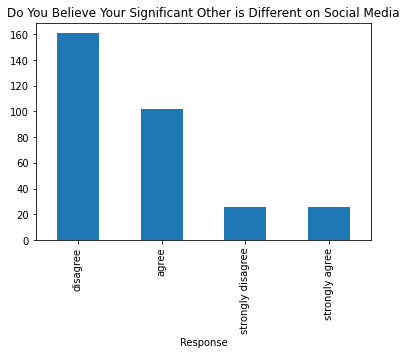

In [72]:
q2_df['sm_different'].replace(' ', np.nan, inplace=True)
different_rf = q2_df['sm_different'].isna()
q2_df[-different_rf]['sm_different'].value_counts().plot(kind='bar')
plt.title('Do You Believe Your Significant Other is Different on Social Media')
plt.xlabel('Response');

In [73]:
q2_df['sm_authentic'] = q2_df['sm_authentic'].map(mappingpknowledge_side)

/tmp/ipykernel_767355/649117010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_authentic'] = q2_df['sm_authentic'].map(mappingpknowledge_side)


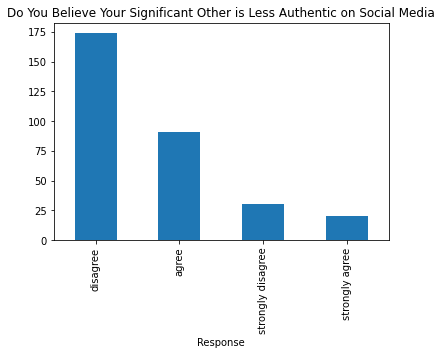

In [74]:
q2_df['sm_authentic'].replace(' ', np.nan, inplace=True)
authentic_rf = q2_df['sm_authentic'].isna()
q2_df[-authentic_rf]['sm_authentic'].value_counts().plot(kind='bar')
plt.title('Do You Believe Your Significant Other is Less Authentic on Social Media')
plt.xlabel('Response');

In [75]:
q2_df['sm_escape'] = q2_df['sm_escape'].map(mappingpknowledge_side)

/tmp/ipykernel_767355/4288817742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_escape'] = q2_df['sm_escape'].map(mappingpknowledge_side)


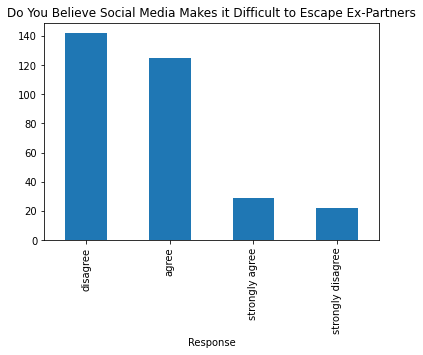

In [76]:
q2_df['sm_escape'].replace(' ', np.nan, inplace=True)
escape_rf = q2_df['sm_escape'].isna()
q2_df[-escape_rf]['sm_escape'].value_counts().plot(kind='bar')
plt.title('Do You Believe Social Media Makes it Difficult to Escape Ex-Partners')
plt.xlabel('Response');

In [77]:
q2_df['sm_too_many'] = q2_df['sm_too_many'].map(mappingpknowledge_side)

/tmp/ipykernel_767355/1595135478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_too_many'] = q2_df['sm_too_many'].map(mappingpknowledge_side)


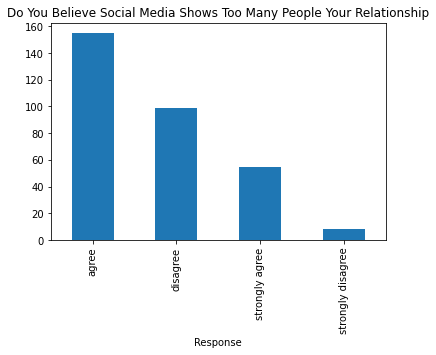

In [78]:
q2_df['sm_too_many'].replace(' ', np.nan, inplace=True)
too_many_rf = q2_df['sm_too_many'].isna()
q2_df[-too_many_rf]['sm_too_many'].value_counts().plot(kind='bar')
plt.title('Do You Believe Social Media Shows Too Many People Your Relationship')
plt.xlabel('Response');

In [79]:
q2_df['sm_support_rel_end'] = q2_df['sm_support_rel_end'].map(mappingpknowledge_side)

/tmp/ipykernel_767355/2944119359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_support_rel_end'] = q2_df['sm_support_rel_end'].map(mappingpknowledge_side)


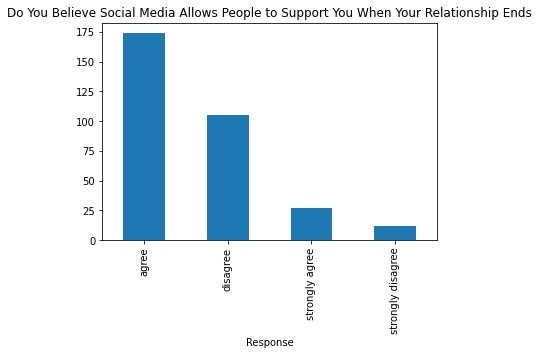

In [80]:
q2_df['sm_support_rel_end'].replace(' ', np.nan, inplace=True)
end_rf = q2_df['sm_support_rel_end'].isna()
q2_df[-end_rf]['sm_support_rel_end'].value_counts().plot(kind='bar')
plt.title('Do You Believe Social Media Allows People to Support You When Your Relationship Ends')
plt.xlabel('Response');

In [81]:
mappingpknowledge_yesno = {'1':'yes', '2':'no', '3':'refused', '4': 'strongly disagree', '59': 'refused', '0':None, 'NaN': None, '71':None, '22':None}
q2_df['sm_post_support'] = q2_df['sm_post_support'].map(mappingpknowledge_yesno)

/tmp/ipykernel_767355/2161607241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_post_support'] = q2_df['sm_post_support'].map(mappingpknowledge_yesno)


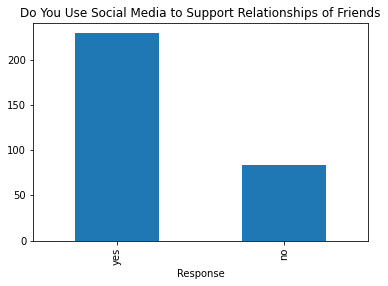

In [82]:
q2_df['sm_post_support'].replace(' ', np.nan, inplace=True)
support_rf = q2_df['sm_post_support'].isna()
q2_df[-support_rf]['sm_post_support'].value_counts().plot(kind='bar')
plt.title('Do You Use Social Media to Support Relationships of Friends')
plt.xlabel('Response');

In [83]:
q2_df['sm_post_affection'] = q2_df['sm_post_affection'].map(mappingpknowledge_yesno)

/tmp/ipykernel_767355/1397931941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df['sm_post_affection'] = q2_df['sm_post_affection'].map(mappingpknowledge_yesno)


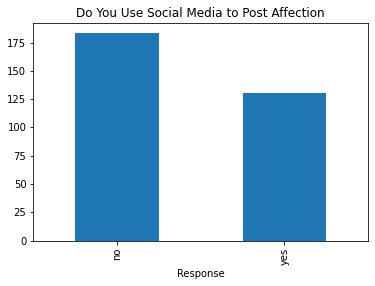

In [84]:
q2_df['sm_post_affection'].replace(' ', np.nan, inplace=True)
affection_rf = q2_df['sm_post_affection'].isna()
q2_df[-affection_rf]['sm_post_affection'].value_counts().plot(kind='bar')
plt.title('Do You Use Social Media to Post Affection')
plt.xlabel('Response');

# Q2 Answer

Give that, for the most part, the majority of people appear to believe that there is a certain level of legitimacy and authenticity represented on social media, it seems that the way in which this impacts people who are either in or have just left relationships is that they find it difficult to stop thinking about their partners, while simultaneously using social media to support others in relationships.

# Q2 Interpretation/Observations

These results were relatively surprising to me, as I thought that most people were of the mind that social media is not a true representation of one's life, and is instead a hyper-polished "highlight reel." I believe that these results are likely due to the age of the respondents: older, non-teenage participants might have a better understanding of social media and might have answered the questions differently.

# Q3 Steps

1) Identify whether or not social media and texting has made people feel stronger (as above in Q1)
2) Identify whether or not people in relationships have been able to resolve issues through texting and social media
3) Analyze responses
4) Draw conclusions

# Q3 Code

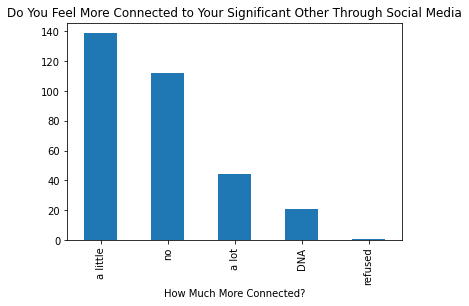

In [85]:
cleandating_df['sm_feel_connected'].replace(' ', np.nan, inplace=True)
connected_rf = cleandating_df['sm_feel_connected'].isna()
cleandating_df[-connected_rf]['sm_feel_connected'].value_counts().plot(kind='bar')
plt.title('Do You Feel More Connected to Your Significant Other Through Social Media')
plt.xlabel('How Much More Connected?');

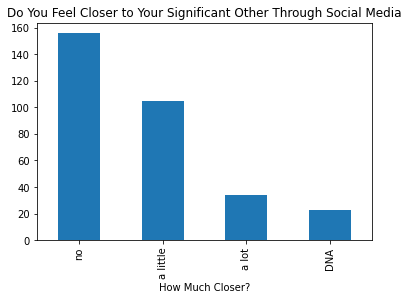

In [54]:
cleandating_df['sm_feel_closer'].replace(' ', np.nan, inplace=True)
closer_rf = cleandating_df['sm_feel_closer'].isna()
cleandating_df[-closer_rf]['sm_feel_closer'].value_counts().plot(kind='bar')
plt.title('Do You Feel Closer to Your Significant Other Through Social Media')
plt.xlabel('How Much Closer?');

In [87]:
cleandating_df['closer_text'] = cleandating_df['closer_text'].map(mappingpknowledge_yesno)

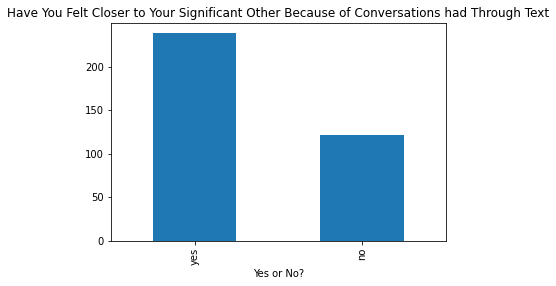

In [88]:
cleandating_df['closer_text'].replace(' ', np.nan, inplace=True)
closer_text_rf = cleandating_df['closer_text'].isna()
cleandating_df[-closer_text_rf]['closer_text'].value_counts().plot(kind='bar')
plt.title('Have You Felt Closer to Your Significant Other Because of Conversations had Through Text')
plt.xlabel('Yes or No?');

In [89]:
cleandating_df['argument_resolve_text'] = cleandating_df['argument_resolve_text'].map(mappingpknowledge_yesno)

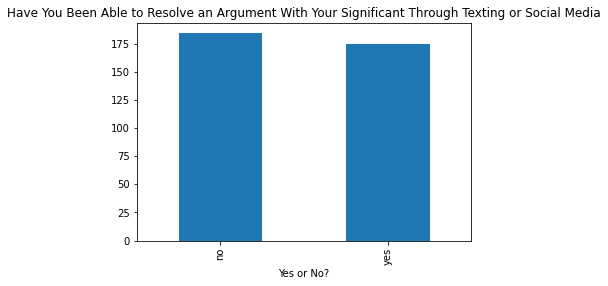

In [90]:
cleandating_df['argument_resolve_text'].replace(' ', np.nan, inplace=True)
argument_rf = cleandating_df['argument_resolve_text'].isna()
cleandating_df[-argument_rf]['argument_resolve_text'].value_counts().plot(kind='bar')
plt.title('Have You Been Able to Resolve an Argument With Your Significant Through Texting or Social Media')
plt.xlabel('Yes or No?');

# Q3 Answers

Though the majority of people as a whole do not say that they feel particularly closer to their significant other because of texting and social media, they do say that specific conversations that they have had with each other through texting and social media have made them feel closer. Approximately half of respondents have also said that they have had serious arguments resolved through texting and social media.

# Q3 Interpretation/Observations

This question illustrates whether people are able to strengthen their relationships and form meaningful bonds with their partners through social media and texting. The results are a bit contradictory though: people ay that they are both not more connected to their partners but that texting and social media have led to instances in which they felt closer. I am curious as to why this dichotomy exists and from where the contradiction stems: I will likely do some outside research to complement this data analysis and dig in to the question further.

# Conclusion

Through the analysis of my section of the PEW Research data, I have analyzed whether or not people feel closer to each other when in relationships through social media and texting, if respondents understand social media to be a literal and legitimate or fake representation of the lives of others, and whether or not serious and strong bonds can be formed through social media and texting. There is a fair amount of dichotomy in the results: they often contradict each other in minor ways that, from a quantitative perspective, do not follow the same logical though process. That being said, given that most of the participants are younger individuals, it is not to be expected that all responses are completely coherent and logical.

# Questions and Concerns

I am going to do some more research on teens' understanding of relationships formed through the Internet, so as to strengthen both my understanding of the topic and my ability to analyze some of these results going forward. When we return from break, Joy, Sofi and I will need to work on combining our analyses of the broader dataset to incorporate all of our questions into a single, overarching analysis. Other than that, I do not believe that I have many questions, and I am looking forward to continuing the project with the other members of the group.